+------+-------------------+-------------------+--------+----+
|TripID|          StartTime|            EndTime|Distance|Fare|
+------+-------------------+-------------------+--------+----+
|     1|2023-01-01 08:00:00|2023-01-01 08:30:00|    10.0|20.0|
|     2|2023-01-01 09:00:00|2023-01-01 09:45:00|    15.0|30.0|
|     3|2023-01-01 10:00:00|2023-01-01 10:20:00|     5.0|10.0|
|     4|2023-01-01 11:00:00|2023-01-01 11:50:00|    20.0|40.0|
|     5|2023-01-01 12:00:00|2023-01-01 12:15:00|     3.0| 6.0|
|     6|2023-01-01 13:00:00|2023-01-01 13:30:00|    12.0|24.0|
|     7|2023-01-01 14:00:00|2023-01-01 14:45:00|    18.0|36.0|
|     8|2023-01-01 15:10:00|2023-01-01 15:20:00|     2.0| 4.0|
|     9|2023-01-01 16:00:00|2023-01-01 16:30:00|     8.0|16.0|
+------+-------------------+-------------------+--------+----+

+------+-------------------+-------------------+--------+----+--------+
|TripID|          StartTime|            EndTime|Distance|Fare|Duration|
+------+-------------------+--------

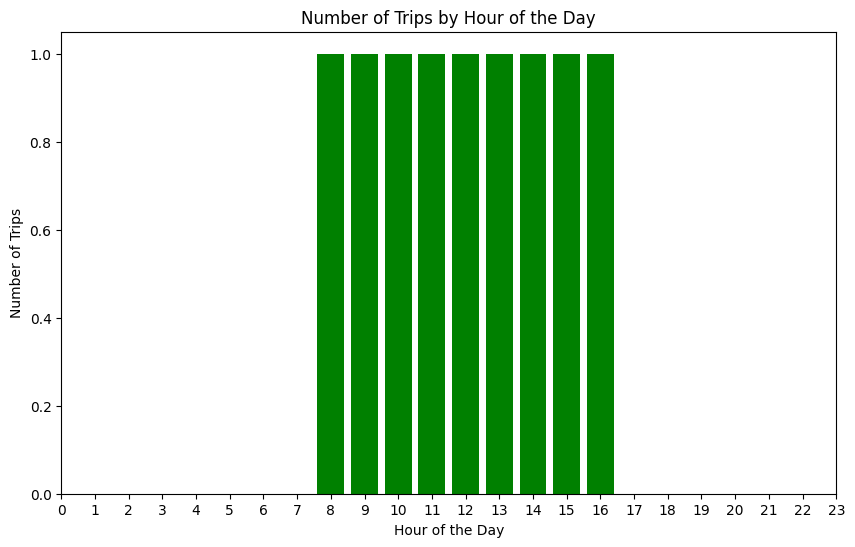

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import StructType, StructField, IntegerType, FloatType, TimestampType
from datetime import datetime

spark = SparkSession.builder \
    .appName("Trip Data Analysis") \
    .getOrCreate()

schema = StructType([
    StructField("TripID", IntegerType(), True),
    StructField("StartTime", TimestampType(), True),
    StructField("EndTime", TimestampType(), True),
    StructField("Distance", FloatType(), True),
    StructField("Fare", FloatType(), True)
])

data = [
    (1, datetime(2023, 1, 1, 8, 0, 0), datetime(2023, 1, 1, 8, 30, 0), 10.0, 20.0),
    (2, datetime(2023, 1, 1, 9, 0, 0), datetime(2023, 1, 1, 9, 45, 0), 15.0, 30.0),
    (3, datetime(2023, 1, 1, 10, 0, 0), datetime(2023, 1, 1, 10, 20, 0), 5.0, 10.0),
    (4, datetime(2023, 1, 1, 11, 0, 0), datetime(2023, 1, 1, 11, 50, 0), 20.0, 40.0),
    (5, datetime(2023, 1, 1, 12, 0, 0), datetime(2023, 1, 1, 12, 15, 0), 3.0, 6.0),
    (6, datetime(2023, 1, 1, 13, 0, 0), datetime(2023, 1, 1, 13, 30, 0), 12.0, 24.0),
    (7, datetime(2023, 1, 1, 14, 0, 0), datetime(2023, 1, 1, 14, 45, 0), 18.0, 36.0),
    (8, datetime(2023, 1, 1, 15, 10, 0), datetime(2023, 1, 1, 15, 20, 0), 2.0, 4.0),
    (9, datetime(2023, 1, 1, 16, 0, 0), datetime(2023, 1, 1, 16, 30, 0), 8.0, 16.0)
]


trips_df = spark.createDataFrame(data, schema)
trips_df.show()

trips_df = trips_df.withColumn("Duration", (F.col("EndTime").cast("long") - F.col("StartTime").cast("long")) / 60)
trips_df.show()

average_fare_per_mile = trips_df.agg(F.avg(F.col("Fare") / F.col("Distance")).alias("AverageFarePerMile"))
average_fare_per_mile.show()

top_longest_trips = trips_df.orderBy("Distance", ascending=False).limit(3)
top_longest_trips.show()

trips_by_hour = trips_df.groupBy(F.hour("StartTime").alias("Hour")).agg(F.count("TripID").alias("TotalTrips"))
trips_by_hour.show()

import matplotlib.pyplot as plt

trips_by_hour_pd = trips_by_hour.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(trips_by_hour_pd['Hour'], trips_by_hour_pd['TotalTrips'], color='green')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Hour of the Day')
plt.xticks(range(24))
plt.show()